In [33]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [12]:
def _importData():
    df = pd.read_csv("penguins.csv")
    global ds
    ds = df[['bill_length_mm', 'flipper_length_mm', 'bill_depth_mm', 'body_mass_g']]
_importData()

In [13]:
def _standardScaller(ds):
    scaler = StandardScaler()
    global scaled_ds
    scaled_ds = scaler.fit_transform(ds)
    return scaled_ds

In [14]:
def _inertias(ds):
    global inertia
    inertia = []
    for k in range(1, 10):
        model = KMeans(n_clusters=k, random_state=False)
        model.fit(ds)
        inertia.append(model.inertia_)
    # plt.plot(range(1, 10), inertia, marker= 'o')
    # plt.show()
    return inertia

In [15]:
def _elbow(inertia):
    global elbow_point
    inertia_diffs = np.diff(inertia)
    inertia_diffs2 = np.diff(inertia_diffs)
    elbow_point = np.argmax(inertia_diffs2) + 2
    return elbow_point

In [16]:
def _fit():
    global model
    global tsne_ds
    scalled_ds = _standardScaller(ds)
    tsne_model = TSNE(learning_rate=0.01)
    tsne_ds = pd.DataFrame(tsne_model.fit_transform(scalled_ds))
_fit()
tsne_inertias = _inertias(tsne_ds)
tsne_elbow_point = _elbow(tsne_inertias)

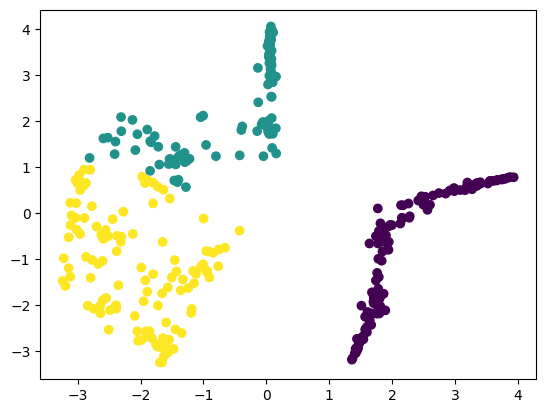

In [23]:
def _scatter():
    model = KMeans(n_clusters=3, random_state=False)
    model.fit(tsne_ds)
    plt.scatter(tsne_ds[0], tsne_ds[1], c = model.labels_)
    plt.show
_scatter()

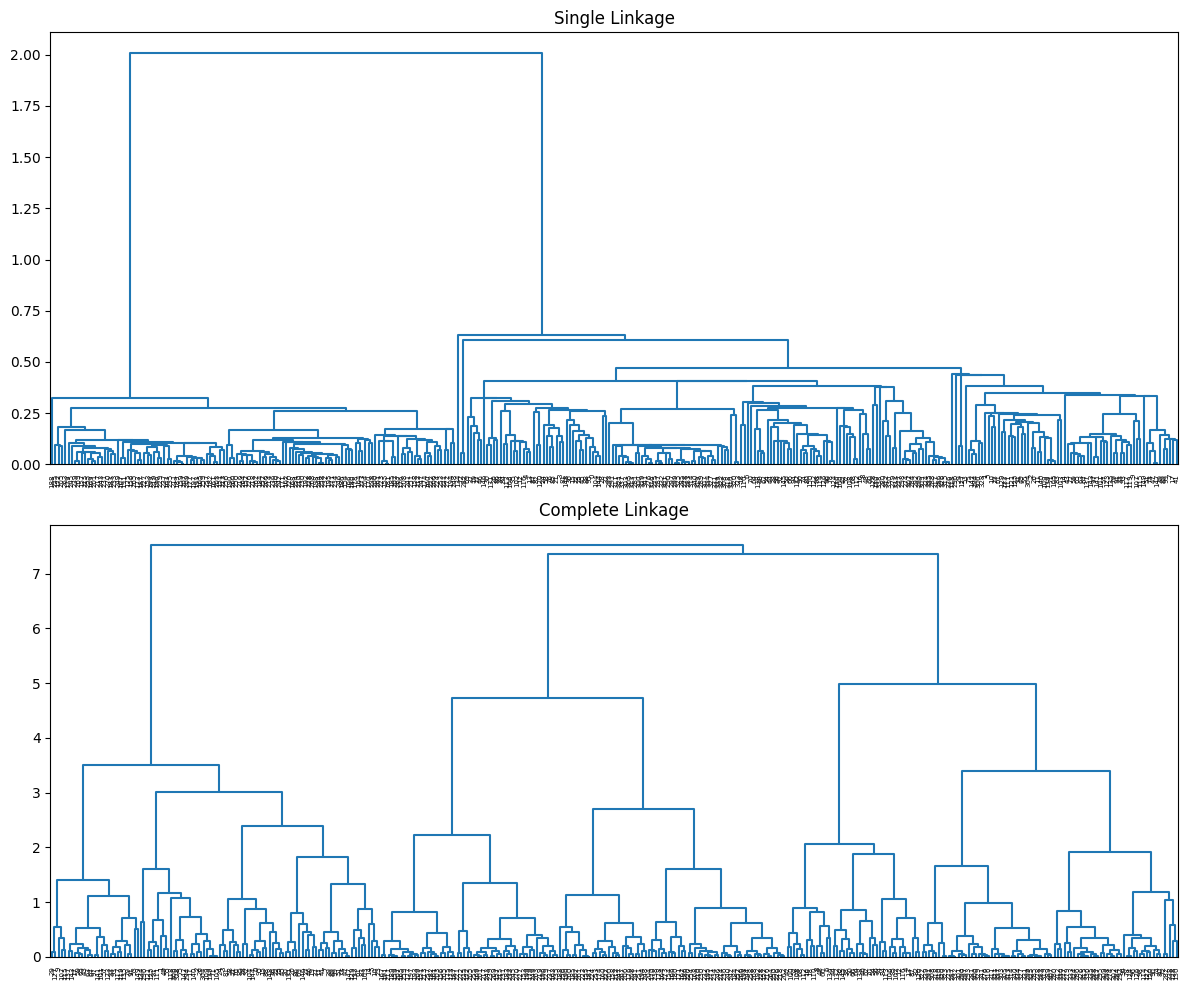

Single Linkage Clusters: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
Complete Linkage Clusters: [1 1 1 1 3 1 3 1 3 1 1 1 3 3 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1
 1 3 1 3 1 3 1 3 1 1 1 3 1 3 1 3 1 3 1 3 1 1 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 1 1 3 1 3 1 3 1 3 1 1 3 1 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 1 1 3 1 3 1 3
 1 3 3 3 1 3 1 1 1 3 1 3 1 3

In [36]:
def _dendrogram():
    Z_single = linkage(tsne_ds, method='single')
    Z_complete = linkage(tsne_ds, method='complete')
    plt.figure(figsize=(12, 10))

    plt.subplot(2, 1, 1)
    dendrogram(Z_single, color_threshold=0)
    plt.title('Single Linkage')

    plt.subplot(2, 1, 2)
    dendrogram(Z_complete, color_threshold=0)
    plt.title('Complete Linkage')

    plt.tight_layout()
    plt.show()

    clusters_single = fcluster(Z_single, 3, criterion='maxclust')
    clusters_complete = fcluster(Z_complete, 3, criterion='maxclust')

    print(f"Single Linkage Clusters: {clusters_single}")
    print(f"Complete Linkage Clusters: {clusters_complete}")
_dendrogram()

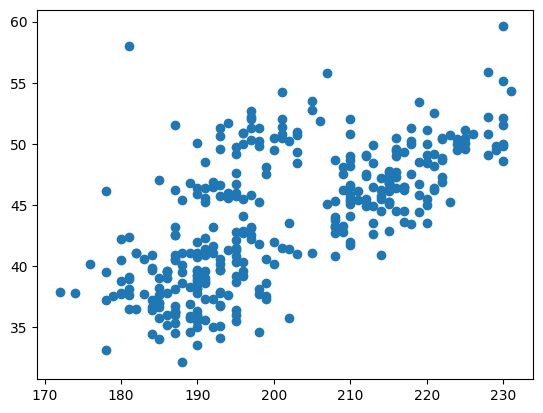

In [46]:
def _subplot_0():
    plt.scatter(ds['flipper_length_mm'], ds['bill_length_mm'])
_subplot_0()

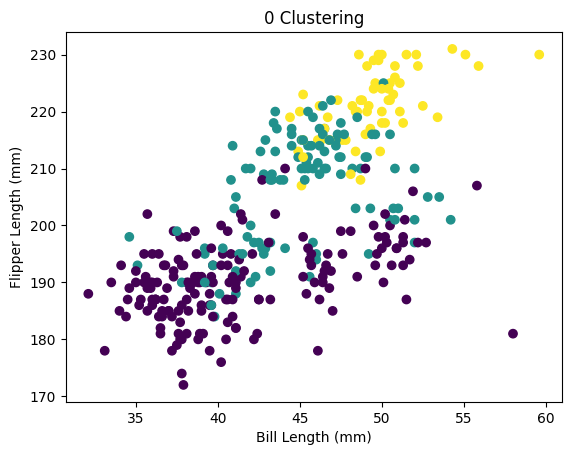

In [47]:
def _subplot_3():
    model = KMeans(n_clusters=3, random_state=None)
    model.fit(tsne_ds)
    plt.scatter(ds['bill_length_mm'], ds['flipper_length_mm'], c=model.labels_)
    plt.xlabel('Bill Length (mm)')
    plt.ylabel('Flipper Length (mm)')
    plt.title('0 Clustering')
    plt.show()  
_subplot_3()